In [48]:
import csv
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error as mse
os.getcwd()

'/home/shubham/Downloads/reddit-top-2.5-million-master/data'

In [5]:
os.chdir('/home/shubham/Downloads/reddit-top-2.5-million-master/data')

In [6]:
df=pd.read_csv('3amjokes.csv')
df.head()

,created_utc,score,domain,id,title,author,ups,downs,num_comments,permalink,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.368644e+09,518,self.3amjokes,1eednd,Why was the soldier pinned down?,vaginal_animal,589,71,21,http://www.reddit.com/r/3amjokes/comments/1eed...,...,False,NaN,t5_2vc9u,False,NaN,NaN,True,t3_1eednd,http://www.reddit.com/r/3amjokes/comments/1eed...,NaN
1,1.368057e+09,449,self.3amjokes,1dyted,Why does a milking stool only have 3 legs?,traceamountofpeanuts,517,68,12,http://www.reddit.com/r/3amjokes/comments/1dyt...,...,False,NaN,t5_2vc9u,False,NaN,NaN,True,t3_1dyted,http://www.reddit.com/r/3amjokes/comments/1dyt...,NaN
2,1.368707e+09,406,self.3amjokes,1eg314,What kind of concert only costs 45 cents?,anniemacsim,492,86,11,http://www.reddit.com/r/3amjokes/comments/1eg3...,...,False,NaN,t5_2vc9u,False,NaN,NaN,True,t3_1eg314,http://www.reddit.com/r/3amjokes/comments/1eg3...,NaN
3,1.366595e+09,389,self.3amjokes,1cu3ww,What's brown and rhymes with snoop?,precisely_squeezes,462,73,7,http://www.reddit.com/r/3amjokes/comments/1cu3...,...,False,NaN,t5_2vc9u,False,NaN,NaN,True,t3_1cu3ww,http://www.reddit.com/r/3amjokes/comments/1cu3...,NaN
4,1.368902e+09,372,self.3amjokes,1el71x,"I went to a zoo, and the only animal there was...",BO28,434,62,6,http://www.reddit.com/r/3amjokes/comments/1el7...,...,False,NaN,t5_2vc9u,False,NaN,NaN,True,t3_1el71x,http://www.reddit.com/r/3amjokes/comments/1el7...,NaN


In [7]:
df.describe()

/home/shubham/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,created_utc,score,ups,downs,num_comments,link_flair_text,thumbnail,link_flair_css_class,author_flair_css_class,distinguished
count,7.190000e+02,719.000000,719.000000,719.000000,719.000000,0.0,0.0,0.0,0.0,0.0
mean,1.367840e+09,53.972184,69.447844,15.681502,3.567455,NaN,NaN,NaN,NaN,NaN
std,7.215939e+06,63.968889,75.361153,13.193126,3.693418,NaN,NaN,NaN,NaN,NaN
min,1.350662e+09,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1.365433e+09,11.000000,17.500000,6.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,1.369056e+09,35.000000,47.000000,13.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,1.373170e+09,74.500000,98.000000,22.000000,5.000000,NaN,NaN,NaN,NaN,NaN
max,1.376755e+09,518.000000,589.000000,86.000000,32.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
X=df.iloc[:,[0,6,7,8]]
X.head()

,created_utc,ups,downs,num_comments
0,1.368644e+09,589,71,21
1,1.368057e+09,517,68,12
2,1.368707e+09,492,86,11
3,1.366595e+09,462,73,7
4,1.368902e+09,434,62,6


In [10]:
Y=df.iloc[:,1]
Y.head()

0    518
1    449
2    406
3    389
4    372
Name: score, dtype: int64

In [11]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=33)
X_train.head()

,created_utc,ups,downs,num_comments
271,1.360785e+09,79,26,5
634,1.372329e+09,2,2,1
320,1.372375e+09,54,13,1
162,1.354597e+09,93,15,4
38,1.369448e+09,198,27,4


In [15]:
lreg= linear_model.LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print("Coefficients: ",lreg.coef_)

Coefficients:  [ -1.49105438e-08   9.96013662e-01  -9.83134421e-01  -2.91923473e-02]


In [34]:
np.mean((lreg.predict(X_test)- Y_test)**2)

0.829711467889457

In [36]:
lreg.score(X_test, Y_test)

0.99978728080196255

In [37]:
Z=df.iloc[:,[6,7]]
Z.head()

,ups,downs
0,589,71
1,517,68
2,492,86
3,462,73
4,434,62


In [38]:
Z_train, Z_test, Y_train1, Y_test1= train_test_split(Z,Y,test_size=0.2, random_state=32)
Z_train.head()

,ups,downs
674,1,2
250,67,15
352,52,13
656,7,9
603,2,1


In [41]:
lreg1=linear_model.LinearRegression()
lreg1.fit(Z_train, Y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
lreg1.coef_

array([ 0.99553527, -0.98678502])

In [43]:
lreg1.score(Z_test, Y_test1)

0.99989195614765625

In [44]:
os.getcwd()

'/home/shubham/Downloads/reddit-top-2.5-million-master/data'

In [45]:
path=r'/home/shubham/Downloads/reddit-top-2.5-million-master/data'

In [46]:
path

'/home/shubham/Downloads/reddit-top-2.5-million-master/data'

In [49]:
allFiles = glob.glob(path + "/*.csv")

In [51]:
for filename in allFiles:
    print (filename)

/home/shubham/Downloads/reddit-top-2.5-million-master/data/celebrities.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/LaTeX.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/Green.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/writing.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/Jeep.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/LetsTalkMusic.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/RedditLaqueristas.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/Illustration.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/Nerf.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/mathrock.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/fashion.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/penpals.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data/needadvice.csv
/home/shubham/Downloads/reddit-top-2.5-million-master/data

In [52]:
frame= pd.DataFrame()

In [53]:
list_= []

In [54]:
for file_ in allFiles:
    df_=pd.read_csv(file_,index_col=None,header=0)
    list_.append(df_)
frame=pd.concat(list_)

In [55]:
frame

,created_utc,score,domain,id,title,author,ups,downs,num_comments,permalink,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.367953e+09,76.0,imgur.com,1dvmfk,Friend's car got hit with a golf ball. Left ma...,tommypie,82.0,6.0,6.0,http://www.reddit.com/r/celebrities/comments/1...,...,False,http://b.thumbs.redditmedia.com/DJkGzo1OGGkGbC...,t5_2qhul,False,NaN,NaN,False,t3_1dvmfk,http://imgur.com/cp2ZH03,NaN
1,1.369073e+09,65.0,imgur.com,1ephh2,Taylor Swift reaction to Selena and Bieber is ...,Dtmrm2,78.0,13.0,5.0,http://www.reddit.com/r/celebrities/comments/1...,...,False,http://c.thumbs.redditmedia.com/buGNPPBRu5NALA...,t5_2qhul,False,NaN,NaN,False,t3_1ephh2,http://imgur.com/NDcdZ0H,NaN
2,1.375090e+09,43.0,25.media.tumblr.com,1j9n2m,"I work in a little pub in Chester, England, an...",Cedig,47.0,4.0,3.0,http://www.reddit.com/r/celebrities/comments/1...,...,False,http://a.thumbs.redditmedia.com/n_tH3ElajwwpE2...,t5_2qhul,False,NaN,NaN,False,t3_1j9n2m,http://25.media.tumblr.com/ab0435ef35dd2ed2a1d...,NaN
3,1.365302e+09,43.0,i.imgur.com,1btys6,I really miss this guy :(,SokkieTheSkelly,50.0,7.0,4.0,http://www.reddit.com/r/celebrities/comments/1...,...,False,http://c.thumbs.redditmedia.com/3SsKdJvXm9ziYu...,t5_2qhul,False,NaN,NaN,False,t3_1btys6,http://i.imgur.com/0PUH8Uk.jpg,NaN
4,1.357883e+09,41.0,imgur.com,16d536,Good Guy Joseph Gordon Levitt,imeowtoomuch,46.0,5.0,1.0,http://www.reddit.com/r/celebrities/comments/1...,...,False,http://f.thumbs.redditmedia.com/GbJMUcbegFAwcq...,t5_2qhul,False,NaN,NaN,False,t3_16d536,http://imgur.com/gallery/3Gyph/new,NaN
5,1.375387e+09,42.0,buzzfeed.com,1jikpe,Nick Cannon writes open letter to Amanda Bynes...,TheManWithNoNam3,49.0,7.0,3.0,http://www.reddit.com/r/celebrities/comments/1...,...,False,http://f.thumbs.redditmedia.com/rSkkmI6hc75nkY...,t5_2qhul,False,NaN,NaN,False,t3_1jikpe,http://www.buzzfeed.com/whitneyjefferson/nick-...,NaN
6,1.364585e+09,39.0,buzzfeed.com,1b9cbe,22 Celebrities You Probably Didn't Realize Wer...,epml21,47.0,8.0,8.0,http://www.reddit.com/r/celebrities/comments/1...,...,False,http://e.thumbs.redditmedia.com/8c6eyU9Sx5K9Za...,t5_2qhul,False,NaN,NaN,False,t3_1b9cbe,http://www.buzzfeed.com/awesomer/22-celebritie...,NaN
7,1.361839e+09,39.0,jezebel.com,1985nj,Why you think Jennifer Lawrence is your new BFF,CatTP,43.0,4.0,3.0,http://www.reddit.com/r/celebrities/comments/1...,...,False,http://b.thumbs.redditmedia.com/HiLUM7b0Wi-3ZX...,t5_2qhul,False,NaN,NaN,False,t3_1985nj,http://jezebel.com/5986705/11-reasons-why-jenn...,NaN
8,1.358998e+09,42.0,i.imgur.com,1762gn,Steve Jobs used to look a lot like Ashton Kutc...,McPhart,47.0,5.0,5.0,http://www.reddit.com/r/celebrities/comments/1...,...,False,http://f.thumbs.redditmedia.com/JoWLjzmX9M57_C...,t5_2qhul,False,NaN,NaN,False,t3_1762gn,http://i.imgur.com/ypbRMvK.jpg,NaN
9,1.358092e+09,38.0,i.imgur.com,16hsi3,A lot of these guys look EXACTLY the same toda...,osimeon,45.0,7.0,1.0,http://www.reddit.com/r/celebrities/comments/1...,...,False,http://f.thumbs.redditmedia.com/QyJ10yHcHydlpx...,t5_2qhul,False,NaN,NaN,False,t3_16hsi3,http://i.imgur.com/XUAg0.jpg,NaN


In [58]:
subreds=frame.iloc[:,14]

In [61]:
len(subreds.unique())

2499

In [68]:
unique_subreds = pd.DataFrame(subreds.unique())

In [69]:
subreds_Train, subreds_Test= train_test_split(unique_subreds,test_size=0.2)

In [72]:
subreds_Test.describe()

,0
count,500
unique,500
top,t5_2rloq
freq,1


In [ ]:
subreds_train_series = pd.Series(subreds_Train.iloc[:,0])

In [83]:
frame_train = frame[frame['subreddit_id'].isin(subreds_train_series)]

In [84]:
frame_train.head()

,created_utc,score,domain,id,title,author,ups,downs,num_comments,permalink,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.362451e+09,82.0,quickmeme.com,19ojae,Just happened to me...,unrealkoala,120.0,38.0,39.0,http://www.reddit.com/r/LaTeX/comments/19ojae/...,...,False,http://d.thumbs.redditmedia.com/Gt4-6N6Le0ISz1...,t5_2qhbn,False,NaN,NaN,False,t3_19ojae,http://www.quickmeme.com/meme/3t8n5z/,NaN
1,1.371519e+09,76.0,tex.stackexchange.com,1gk2bb,Showcase of beautiful typography done in TeX,visudo,88.0,12.0,0.0,http://www.reddit.com/r/LaTeX/comments/1gk2bb/...,...,False,http://d.thumbs.redditmedia.com/dSFPqXnilJQYbY...,t5_2qhbn,False,NaN,NaN,False,t3_1gk2bb,http://tex.stackexchange.com/questions/1319/sh...,NaN
2,1.331244e+09,70.0,latextemplates.com,qnxg1,LaTeXTemplates.com - A new resource for free h...,VelNZ,78.0,8.0,15.0,http://www.reddit.com/r/LaTeX/comments/qnxg1/l...,...,False,http://d.thumbs.redditmedia.com/9y-dNA0h64adD8...,t5_2qhbn,False,NaN,NaN,False,t3_qnxg1,http://www.latextemplates.com/,NaN
3,1.337365e+09,59.0,howtotex.com,ttlnq,9 essential LaTeX packages everyone should use,andreasw,69.0,10.0,4.0,http://www.reddit.com/r/LaTeX/comments/ttlnq/9...,...,False,http://f.thumbs.redditmedia.com/imfHoeT5zj3BRX...,t5_2qhbn,False,NaN,NaN,False,t3_ttlnq,http://www.howtotex.com/packages/9-essential-l...,NaN
4,1.365158e+09,61.0,sharelatex.com,1bq4jl,A small collection of useful LaTeX templates,jpallen,66.0,5.0,7.0,http://www.reddit.com/r/LaTeX/comments/1bq4jl/...,...,False,http://d.thumbs.redditmedia.com/jk6OW1mvjfq4vH...,t5_2qhbn,False,NaN,NaN,False,t3_1bq4jl,https://www.sharelatex.com/templates#sthash.Au...,NaN


In [85]:
frame_train.describe()

,created_utc,score,ups,downs,num_comments
count,1.818238e+06,1.818238e+06,1.818238e+06,1.818238e+06,1.818238e+06
mean,1.350744e+09,1.716256e+02,3.296740e+02,1.580639e+02,4.255423e+01
std,2.304144e+07,4.063179e+02,1.594592e+03,1.299965e+03,3.872370e+02
min,1.144816e+09,0.000000e+00,0.000000e+00,-3.000000e+00,-5.000000e+00
25%,1.340233e+09,1.600000e+01,2.000000e+01,3.000000e+00,4.000000e+00
50%,1.356930e+09,4.300000e+01,5.100000e+01,8.000000e+00,1.100000e+01
75%,1.367435e+09,1.270000e+02,1.500000e+02,2.300000e+01,2.800000e+01
max,1.377012e+09,2.186800e+04,1.263150e+05,1.233050e+05,3.589220e+05


In [86]:
subreds_test_series = pd.Series(subreds_Test.iloc[:,0])

In [88]:
frame_test= frame[frame['subreddit_id'].isin(subreds_test_series)]

In [89]:
frame_test.describe()

,created_utc,score,ups,downs,num_comments
count,4.478600e+05,447860.000000,447860.000000,447860.000000,447860.000000
mean,1.350034e+09,170.489724,345.994264,175.517454,40.636596
std,2.402315e+07,394.851993,1979.887010,1711.302755,198.841802
min,1.175556e+09,0.000000,0.000000,-2.000000,-5.000000
25%,1.339397e+09,19.000000,23.000000,3.000000,4.000000
50%,1.356231e+09,50.000000,59.000000,9.000000,11.000000
75%,1.367434e+09,141.000000,168.000000,26.000000,29.000000
max,1.377006e+09,21304.000000,240725.000000,225976.000000,28062.000000


In [91]:
Xtrain=frame_train.iloc[:,[6,7]]

In [92]:
Xtrain.head()

,ups,downs
0,120.0,38.0
1,88.0,12.0
2,78.0,8.0
3,69.0,10.0
4,66.0,5.0


In [93]:
Ytrain=frame_train.iloc[:,1]

In [94]:
Ytrain.head()

0    82.0
1    76.0
2    70.0
3    59.0
4    61.0
Name: score, dtype: float64

In [95]:
linreg=linear_model.LinearRegression()
linreg.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
linreg.coef_

array([ 0.9999753 , -0.99997146])

In [105]:
Ypred = linreg.predict(Xtest)

In [97]:
Ytest=frame_test.iloc[:,1]

In [98]:
Ytest.head()

0    76.0
1    65.0
2    43.0
3    43.0
4    41.0
Name: score, dtype: float64

In [101]:
Xtest=frame_test.iloc[:,[6,7]]

In [102]:
Xtest.head()

,ups,downs
0,82.0,6.0
1,78.0,13.0
2,47.0,4.0
3,50.0,7.0
4,46.0,5.0


In [103]:
linreg.score(Xtest,Ytest)

0.9999986167970415

In [106]:
plt.scatter(Ypred, Ytest)

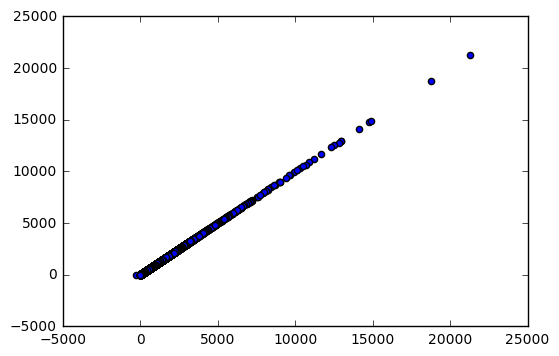

In [107]:
plt.show()